# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt
import os

In [38]:
# Create directories
os.makedirs('./images/plots/')
os.makedirs('./images/EDA/')
os.makedirs('./intermediate_data/')

## County Assigned: Maricopa, AZ, US

### Data Sources:
1. John Hopkins University COVID-19 data 
2. Masking mandates by county 
3. The New York Times mask compliance survey data 
4. Federal Reserve Economic Data, FRED Monthly Data
5. CDC’s Agency for Toxic Substances and Disease Registry Data:
6. Argonne National Laboratory Data for Different Sector Information

#### Note:
Since each of the questions requires different CSVs to be loaded, we will be breaking this notebook down, in terms of questions (Local Functions, Data Acquistion/Loading, Cleaning, EDA, Analysis, Findings)

### Question 1: What was the influence of the pandemic on the unemployment rate and Civil Labor Force in the county?

Hypothesis: Since, increase of COVID-19 cases would have led to many industries shutting down or practicing social distancing, the unemployment rates would be impacted for them. Hence, impacting overall Unemployment and CLF in the country

#### Domain Knowledge:
Civilian labor force is a term used by the Bureau of Labor Statistics (BLS) to categorize the portion of the U.S. civilian population that it considers either employed or unemployed. Military personnel, federal government employees, retirees, handicapped or discouraged workers, and agricultural workers are not part of the civilian labor force.

### 1.1 Data Loading

In [2]:
# Reading the CSVs for Labor Force and Unemployment
df_civilian_labor_force=pd.read_csv('./CivilianLaborForce.csv')
df_unemployment=pd.read_csv('./Unemployment.csv')

In [3]:
# Snapshot of the data
df_civilian_labor_force.head()

,DATE,AZMARI3LFN
0,1990-01-01,1088959
1,1990-02-01,1092079
2,1990-03-01,1095561
3,1990-04-01,1098910
4,1990-05-01,1106691


In [4]:
# Snapshot of the unemployment data
df_unemployment.head()

,DATE,LAUCN040130000000004
0,1990-01-01,49640
1,1990-02-01,46142
2,1990-03-01,46252
3,1990-04-01,46339
4,1990-05-01,46210


### 1.2 Data Understanding and Cleaning

In [5]:
# Renaming columns for understanding
df_civilian_labor_force=df_civilian_labor_force.rename(columns={'AZMARI3LFN':'Civilian_Labor_Force_Population'})
df_unemployment=df_unemployment.rename(columns={'LAUCN040130000000004': 'Unemployed_Population'})

In [6]:
# Looking at the data summary to find missing values, outliers
print (df_civilian_labor_force.shape)
df_civilian_labor_force.describe()

# Data looks complete

(394, 2)


,Civilian_Labor_Force_Population
count,3.940000e+02
mean,1.770236e+06
std,3.515917e+05
min,1.088959e+06
25%,1.497220e+06
50%,1.892480e+06
75%,1.989714e+06
max,2.388131e+06


In [7]:
# Looking at the data summary to find missing values, outliers

print (df_unemployment.shape)
df_unemployment.describe()

# Data looks complete

(394, 2)


,Unemployed_Population
count,394.000000
mean,89029.497462
std,40843.232534
min,34185.000000
25%,56517.250000
50%,79450.500000
75%,104545.000000
max,282195.000000


### 1.3 Data Transformations/Filtering

In [8]:
# Filtering the data to recent years as that is what the analysis is about

df_civilian_labor_force=df_civilian_labor_force[df_civilian_labor_force['DATE']>'2018-01-01']
df_unemployment=df_unemployment[df_unemployment['DATE']>'2018-01-01']

### 1.4 Exploratory Data Analysis

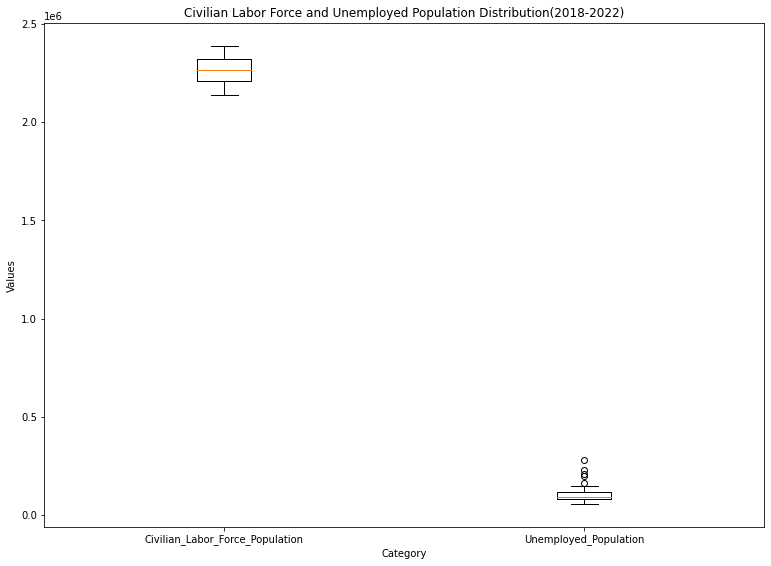

<Figure size 432x288 with 0 Axes>

In [39]:
# Creating box plots to look at distribution of values for both the variables. 
# Boxplots help in highlighting skewed distributions or finding outliers.

data=[df_civilian_labor_force['Civilian_Labor_Force_Population'], df_unemployment['Unemployed_Population']]
fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
ax.set_xticklabels(['Civilian_Labor_Force_Population', 'Unemployed_Population'])
plt.title('Civilian Labor Force and Unemployed Population Distribution(2018-2022)')
plt.ylabel('Values')
plt.xlabel('Category')
# show plot
plt.show()
plt.savefig('./images/EDA/CLF_Unemployment_boxplot.png')

Findings:
1. Civilian Labor Force does not show any outliers
2. Unemployment distribution shows some outliers but they could be influential points for this analysis as a impact of COVID-19, hence we won't be removing them.

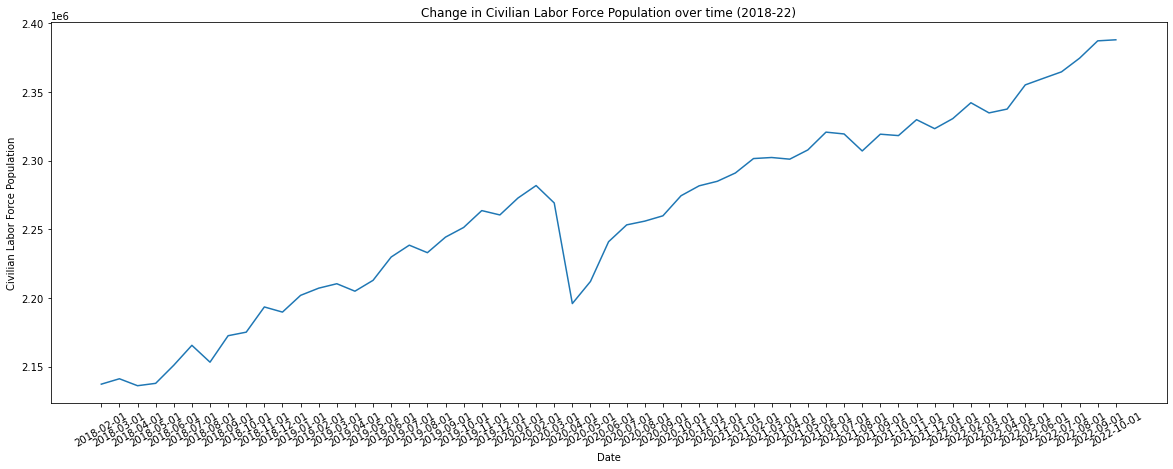

<Figure size 432x288 with 0 Axes>

In [40]:
# Plotting the graph for checking the change in Civilian Labor Force over time from 2018-2022.

fig = plt.figure(figsize =(20, 7))
plt.title('Change in Civilian Labor Force Population over time (2018-22)')
plt.xlabel('Date')
plt.ylabel('Civilian Labor Force Population')
plt.plot(df_civilian_labor_force['DATE'], df_civilian_labor_force['Civilian_Labor_Force_Population'])
plt.xticks(rotation=30)
plt.show()
plt.savefig('./images/EDA/CLF_trends.png')

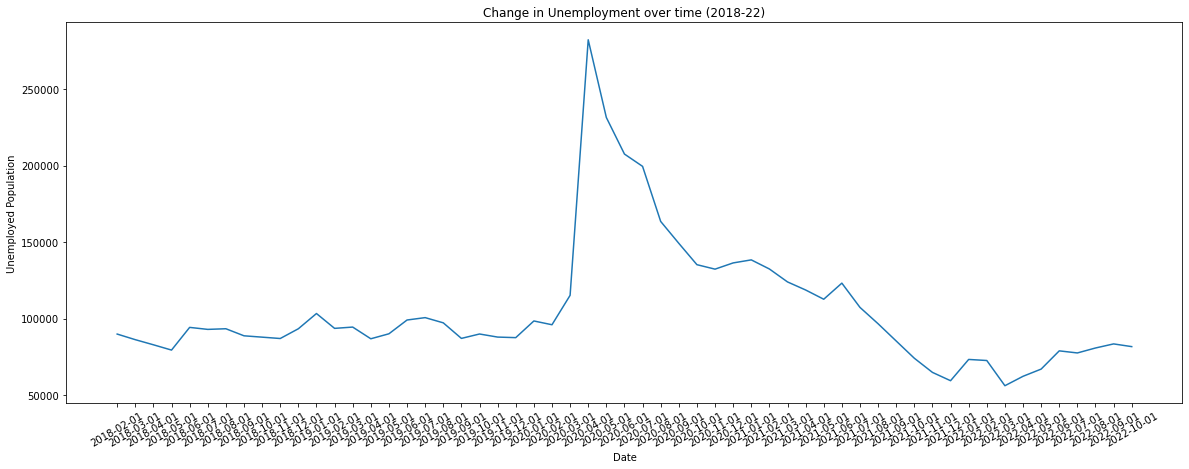

<Figure size 432x288 with 0 Axes>

In [41]:
# Plotting the graph for checking the change in Unemployment over time from 2018-2022.


fig = plt.figure(figsize =(20, 7))
plt.title('Change in Unemployment over time (2018-22)')
plt.xlabel('Date')
plt.ylabel('Unemployed Population')
plt.plot(df_unemployment['DATE'], df_unemployment['Unemployed_Population'])
plt.xticks(rotation=30)
plt.show()
plt.savefig('./images/EDA/Unemployment_trends.png')

In [15]:
### Saving these cleaned files as intermediate files
df_civilian_labor_force.to_csv('./intermediate_data/civilian_labor_force_population.csv')
df_unemployment.to_csv('./intermediate_data/unemployed_population.csv')

### 1.5 Loading COVID-19 data from Common Analysis

<Figure size 2160x504 with 0 Axes>

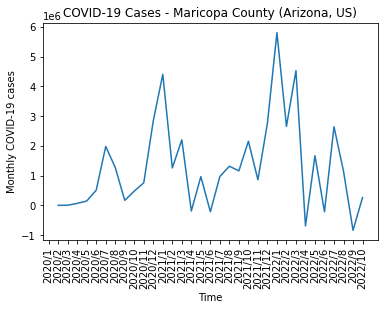

In [42]:
# This code snippet reads the COVID-19 cases data and filters it for Maricopa County. This snipped is referred from
# Part 1 Common analysis.

fig = plt.figure(figsize =(30, 7))

raw_us_confirmed_cases = pd.read_csv("./common_analysis_data/RAW_us_confirmed_cases.csv") 
raw_maricopa_cases = raw_us_confirmed_cases[(raw_us_confirmed_cases["Province_State"] == "Arizona") & (raw_us_confirmed_cases["Admin2"] == "Maricopa")]
maricopa_cases_by_date =  raw_maricopa_cases[raw_maricopa_cases.columns[11:]]
maricopa_cases_by_date = pd.DataFrame(maricopa_cases_by_date.iloc[0])
maricopa_cases_by_date = maricopa_cases_by_date.reset_index()
maricopa_cases_by_date.columns = ["date", "number_of_cases"]

maricopa_cases_by_date.head()


# Creating additional columns for year and month and then getting the number of new confirmed cases per day.
# This is then grouped to get the count of total monthly cases.
maricopa_cases_by_date['year']=pd.to_datetime(maricopa_cases_by_date['date']).dt.year
maricopa_cases_by_date['month']=pd.to_datetime(maricopa_cases_by_date['date']).dt.month
maricopa_cases_by_month=maricopa_cases_by_date.groupby(by=['year','month']).sum().reset_index()
maricopa_cases_by_month['delta']=maricopa_cases_by_month['number_of_cases'].diff()

date=[]
for i in range(len(maricopa_cases_by_month)):
    date.append(str(list(maricopa_cases_by_month['year'])[i])+'/'+str(list(maricopa_cases_by_month['month'])[i]))
maricopa_cases_by_month['date']=date

# Plotting the monthly cases and observing the change
fig, ax=plt.subplots()
plt.xticks(rotation=90)
ax.plot(maricopa_cases_by_month['date'], maricopa_cases_by_month['delta'])
plt.title("COVID-19 Cases - Maricopa County (Arizona, US)")
plt.xlabel("Time")
plt.ylabel("Monthly COVID-19 cases")
plt.savefig('./images/EDA/COVID_19_cases.png')

In [17]:
maricopa_cases_by_month.to_csv('./intermediate_data/COVID_cases_by_month.csv')

### 1.6 Analysis: Check for correlation between COVID-19 monthly cases and Civilian Labor Force and Unemployment

In [18]:
# Creating same columns for Civilian Labor force as for COVID-19 cases above.

df_civilian_labor_force['year']=pd.to_datetime(df_civilian_labor_force['DATE']).dt.year
df_civilian_labor_force['month']=pd.to_datetime(df_civilian_labor_force['DATE']).dt.month
date=[]
for i in range(len(df_civilian_labor_force)):
    date.append(str(list(df_civilian_labor_force['year'])[i])+'/'+str(list(df_civilian_labor_force['month'])[i]))
df_civilian_labor_force['date']=date

In [19]:
# Merging the dataframes on dates to do an apples-to-apples comparison.
clf_cases_df=pd.merge(maricopa_cases_by_month, df_civilian_labor_force, left_on='date', right_on='date', how='inner')

In [20]:
from scipy.stats import pearsonr

# Filling NaN values with Zero, these values are not a part of correlation analysis variables
clf_cases_df=clf_cases_df.fillna(0)


# calculate Pearson's correlation
corr, _ = pearsonr(clf_cases_df['delta'], clf_cases_df['Civilian_Labor_Force_Population'])

In [21]:
print ("The correlation between New cases and CLF population is", corr)

The correlation between New cases and CLF population is 0.14155201075814092


Finding: No strong correlation found between COVID-19 cases and Labor Force participation

In [22]:
# Creating same columns for Unemployment as for COVID-19 cases and CLF population above.

df_unemployment['year']=pd.to_datetime(df_unemployment['DATE']).dt.year
df_unemployment['month']=pd.to_datetime(df_unemployment['DATE']).dt.month
date=[]
for i in range(len(df_unemployment)):
    date.append(str(list(df_unemployment['year'])[i])+'/'+str(list(df_unemployment['month'])[i]))
df_unemployment['date']=date

unemployment_cases_df=pd.merge(maricopa_cases_by_month, df_unemployment, left_on='date', right_on='date', how='inner')

In [23]:
unemployment_cases_df=unemployment_cases_df.fillna(0)

# calculate Pearson's correlation
corr, _ = pearsonr(unemployment_cases_df['delta'], unemployment_cases_df['Unemployed_Population'])

print ("The correlation between New cases and Unemployment is", corr)

The correlation between New cases and Unemployment is -0.22757958425641814


Finding: Mild Negative correlation found between COVID-19 cases and Labor Force participation

### 1.6.2: Check for time-lagged crosscorrelation for CLF and Unemployment

In [24]:
# Declaring the cross-correlation calculation function
def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))

In [25]:
lagged_correlation_unemployment = [crosscorr(unemployment_cases_df['delta'], unemployment_cases_df['Unemployed_Population'], lag=i) for i in range(24)]

In [26]:
max_value = max(lagged_correlation_unemployment)
max_index = lagged_correlation_unemployment.index(max_value)
print ("Lag with maximum correlation for Unemployment: ", max_index+1)

Lag with maximum correlation for Unemployment:  21


We see that there is a moderate cross-correlation between two time series starting at a lag of 18 months (0.378 and the correlation is maximum at 21 months (0.57) 

In [27]:
lagged_correlation_clf = [crosscorr(clf_cases_df['delta'], clf_cases_df['Civilian_Labor_Force_Population'], lag=i) for i in range(24)]

In [28]:
max_value = min(lagged_correlation_clf)
max_index = lagged_correlation_clf.index(max_value)
print ("Lag with maximum correlation for CLF: ", max_index+1)

Lag with maximum correlation for CLF:  22


Similar correlation is observed in Civilian Labor Force participation We see that there is a moderate cross-correlation between two time series starting at a lag of 18 months (-0.36) and the correlation is maximum at 22 months (-0.67)  

Limitation: This could be due to market slowdown, we all know that COVID-19 had a major role to play. Hence, we say it correlates with COVID-19 cases but they might not directly be the cause of it.

### Question 2: How were the socioeconomic factors (Education, Median Household Income, and Gross Domestic Product) impacted at the start of the pandemic?

In this section, we will be doing an exploratory data analysis to observe patterns for variables (Graduate Degrees, GDP and Median Household Income)

# 2.1 Impact on education 

### 2.1.1 Data Loading

In [29]:
# Reading the CSVs for all the degrees (Associate, Bachelors, High School)
# Changing their column names to more understandable ones

df_education_associate=pd.read_csv('./Education_Associate.csv')
df_education_associate.columns=['DATE', 'Number_of_Associate_Degrees']
df_education_associate['year']=pd.to_datetime(df_education_associate['DATE']).dt.year


df_education_bachelor=pd.read_csv('./Education_Bachelors.csv')
df_education_bachelor.columns=['DATE', 'Number_of_Bachelor_Degrees']
df_education_bachelor['year']=pd.to_datetime(df_education_bachelor['DATE']).dt.year


df_education_highschool=pd.read_csv('./Education_high_school.csv')
df_education_highschool.columns=['DATE', 'Number_of_Highschool_Degrees']
df_education_highschool['year']=pd.to_datetime(df_education_highschool['DATE']).dt.year


In [51]:
df_education_associate.to_csv('./intermediate_data/Education_Associate.csv')
df_education_bachelor.to_csv('./intermediate_data/Education_bachelors.csv')
df_education_highschool.to_csv('./intermediate_data/Education_highschool.csv')

In [30]:
# Studying the data and seeing that it looks complete with no specific outlier values
df_education_associate.describe()

,Number_of_Associate_Degrees,year
count,12.000000,12.000000
mean,38.850000,2014.500000
std,1.871072,3.605551
min,35.900000,2009.000000
25%,37.400000,2011.750000
50%,38.600000,2014.500000
75%,40.050000,2017.250000
max,42.200000,2020.000000


In [31]:
# Studying the data and seeing that it looks complete with no specific outlier values
df_education_bachelor.describe()

,Number_of_Bachelor_Degrees,year
count,11.000000,11.000000
mean,30.754545,2015.000000
std,1.476729,3.316625
min,29.000000,2010.000000
25%,29.650000,2012.500000
50%,30.400000,2015.000000
75%,31.700000,2017.500000
max,33.400000,2020.000000


In [32]:
# Studying the data and seeing that it looks complete with no specific outlier values

df_education_highschool.describe()

,Number_of_Highschool_Degrees,year
count,11.000000,11.000000
mean,86.809091,2015.000000
std,0.826383,3.316625
min,85.600000,2010.000000
25%,86.300000,2012.500000
50%,86.800000,2015.000000
75%,87.250000,2017.500000
max,88.400000,2020.000000


### 2.2.2 Exploratory Data Analysis

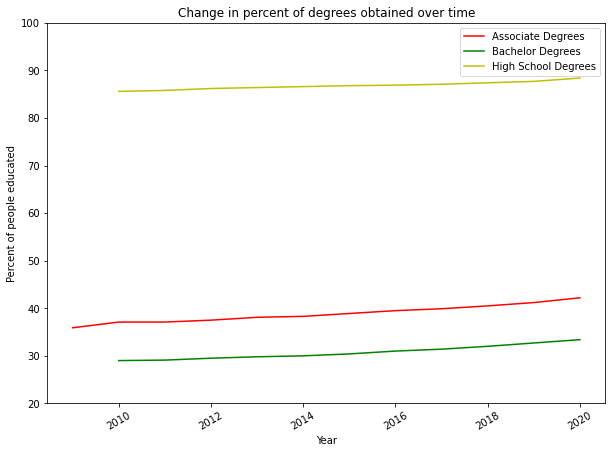

In [43]:
# Plotting the line graphs for change in percentage of degrees obtained over time

fig = plt.figure(figsize =(10, 7))

# Setting the title and X and Y-axis labels
plt.title('Change in percent of degrees obtained over time')
plt.xlabel('Year')
plt.ylabel('Percent of people educated')
plt.xticks(rotation=30)

# The variables to be plotted and their color coding scheme
plt.plot(df_education_associate.year,df_education_associate.Number_of_Associate_Degrees, 'r', label='Associate Degrees')
plt.plot(df_education_bachelor.year,df_education_bachelor.Number_of_Bachelor_Degrees, 'g', label='Bachelor Degrees')
plt.plot(df_education_highschool.year,df_education_highschool.Number_of_Highschool_Degrees, 'y', label='High School Degrees')

# Plotting the legend and specifying the Y-axis limit for readability
leg = plt.legend(loc="upper right")
plt.ylim((20, 100))
plt.savefig('./images/plots/Education.png')

No concrete evidence found for number of degrees until end of 2020. But I think that is due to the limitation of the data. If there was any difference that could potentially be observed it would be in 2021 onwards, because the pandemic had just started at the end of 2019 and all the degrees listed are atleast 2 years and above. Hence no immediate impact of COVID-19 found on percentage change in degrees

# 2.2 Impact on GDP

### 2.2.1 Data Loading

In [45]:
# Loading the data and renaming the columns for readability
df_GDP=pd.read_csv('GDP.csv')
df_GDP.columns=['DATE', 'Gross_domestic_product']
df_GDP['year']=pd.to_datetime(df_GDP['DATE']).dt.year

In [52]:
# Data Summary
df_GDP.describe()
df_GDP.to_csv('./intermediate_data/GDP_trends.csv')
# no anomalies or missing values found

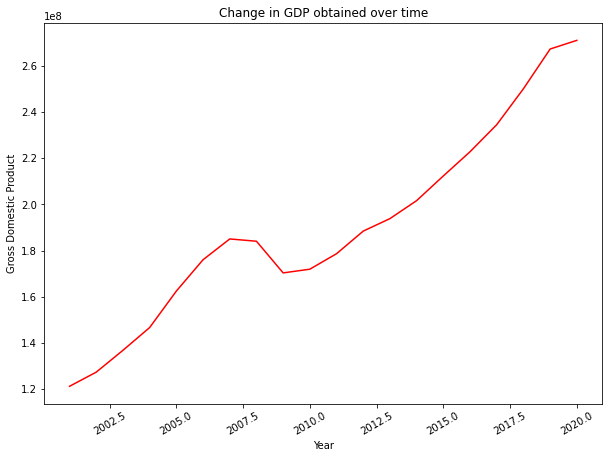

In [47]:
# Plotting the line graph for change in GDP over time
fig = plt.figure(figsize =(10, 7))

plt.title('Change in GDP obtained over time')
plt.xlabel('Year')
plt.ylabel('Gross Domestic Product')
plt.xticks(rotation=30)
plt.plot(df_GDP.year,df_GDP.Gross_domestic_product, 'r', label='GDP')
plt.savefig('./images/plots/GDP.png')

No concrete evidence found for GDP until end of 2020. But I think that is due to the limitation of the data. If there was any difference that could potentially be observed it would be in 2021 onwards, because the pandemic had just started at the end of 2019 and the impact on GDP could possibly be a little later. As an immediate impact, there was slight decrease in the rate of GDP growth from 2019-2020.

## 2.3 Impact on Household Income

### 2.3.1 Loading household income data

In [48]:
# Loading household income data and renaming columns for understandability
df_household_income=pd.read_csv('Household_Income.csv')
df_household_income.columns=['DATE', 'Household_Income']
df_household_income['year']=pd.to_datetime(df_household_income['DATE']).dt.year

In [53]:
# Data Summary
df_household_income.sample(4)
df_household_income.to_csv('./intermediate_data/household_income.csv')

### 2.3.2 Exploratory Data Analysis

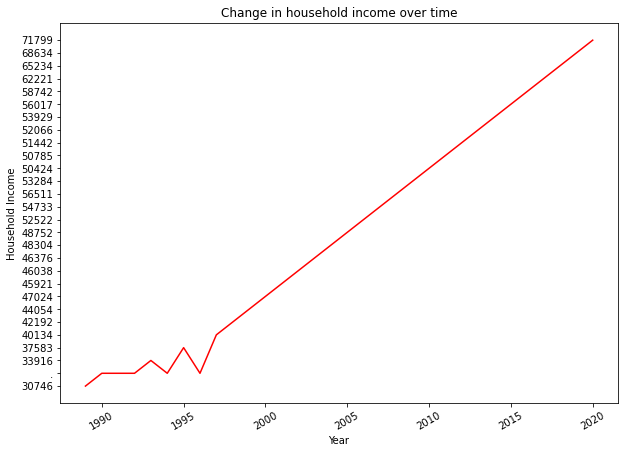

In [50]:
# Plotting the line chart with respective titles and specifying the color of the graph

fig = plt.figure(figsize =(10, 7))

plt.title('Change in household income over time')
plt.xlabel('Year')
plt.ylabel('Household Income')
plt.xticks(rotation=30)
plt.plot(df_household_income.year,df_household_income.Household_Income, 'r', label='Household Income')
plt.savefig('./images/plots/Household_income.png')

No concrete evidence found for household income until end of 2020. But I think that is due to the limitation of the data. If there was any difference that could potentially be observed it would be in 2021 onwards, because the pandemic had just started at the end of 2019 and the impact on household could possibly be a little later. This could probably be more evident from the gradual impact point of view

## Question 3: How did the COVID-19 cases affect the economic indexes of the county in different industries?

To answer this question we will be using time-lagged crosscorrelation for each of the industries in the dataset. Then we will shortlist the ones showing the top correlations. This analysis would tell us which industries are most vulnerable from this standpoint in terms of change in employment.

## 3.1 Data Reading and filtering

In [54]:
# Reading the data and filtering for maricopa county in Arizona
df_economic_data=pd.read_excel('./County Economic Impact Index Data_20220620 Update.xlsx', sheet_name='econ index')
df_economic_data_maricopa=df_economic_data[df_economic_data['county']=='Maricopa County']

In [55]:
df_economic_data_maricopa.head()

,area_fips,state,county,va_base,va_jan20,va_feb20,va_mar20,va_apr20,va_may20,va_jun20,...,index_jul21,index_aug21,index_sep21,index_oct21,index_nov21,index_dec21,index_jan22,index_feb22,index_mar22,index_apr22
103,4013,Arizona,Maricopa County,1.0,310.144592,311.136701,303.128079,285.828658,301.031394,292.33066,...,0.981665,0.98101,0.982117,0.983938,0.985036,0.986216,1.006089,1.006198,1.005829,1.004737


In [60]:
df_economic_data_maricopa.to_csv('./intermediate_data/Economic_data_maricopa.csv')

## 3.2 Exploratory data analysis for important variables

#### 3.2.1 Plotting Value added by all sectors

In [56]:
# Filtering for required columns (Economic index from jan 20 to april 2022)
df_value_added_maricopa=df_economic_data_maricopa[df_economic_data_maricopa.columns[4:32]]

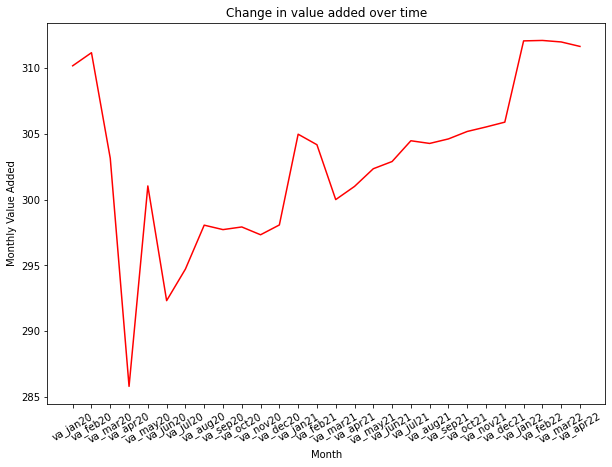

In [57]:
#Adding title, labels for X and Y-axis and then specifying the X-axis and Y-axis
fig = plt.figure(figsize =(10, 7))

plt.title('Change in value added over time')
plt.xlabel('Month')
plt.ylabel('Monthly Value Added')
plt.xticks(rotation=30)
plt.plot(df_value_added_maricopa.columns,df_value_added_maricopa.iloc[0].values, 'r', label='Value Added')
plt.savefig('./images/EDA/Economic_value.png')

#### 3.2.2 Plotting employment change percentage by all sectors

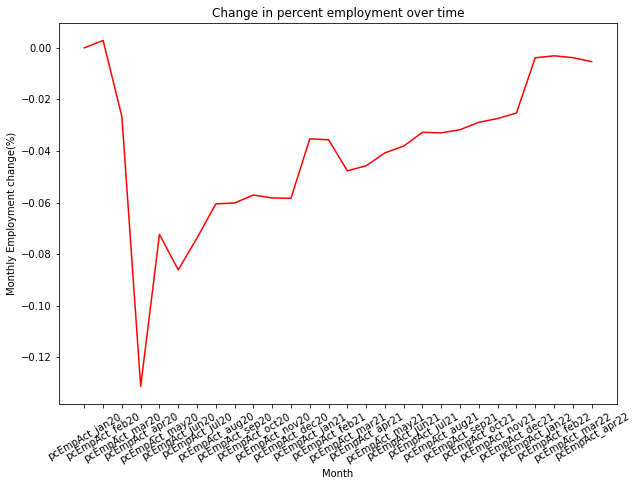

In [58]:
#Adding title, labels for X and Y-axis and then specifying the X-axis and Y-axis

df_percentemp_maricopa=df_economic_data_maricopa[df_economic_data_maricopa.columns[32:60]]
fig = plt.figure(figsize =(10, 7))

plt.title('Change in percent employment over time')
plt.xlabel('Month')
plt.ylabel('Monthly Employment change(%)')
plt.xticks(rotation=30)
plt.plot(df_percentemp_maricopa.columns,df_percentemp_maricopa.iloc[0].values, 'r', label='Percent_employment_change')
plt.savefig('./images/EDA/Percent_Employment_trends.png')

#### 3.3.3 Plotting economic indexes

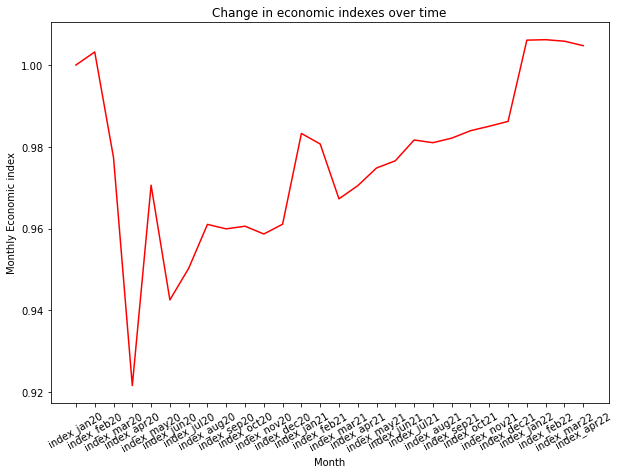

In [59]:
#Adding title, labels for X and Y-axis and then specifying the X-axis and Y-axis

df_economic_indexes_maricopa=df_economic_data_maricopa[df_economic_data_maricopa.columns[60:]]
fig = plt.figure(figsize =(10, 7))

plt.title('Change in economic indexes over time')
plt.xlabel('Month')
plt.ylabel('Monthly Economic index')
plt.xticks(rotation=30)
plt.plot(df_economic_indexes_maricopa.columns,df_economic_indexes_maricopa.iloc[0].values, 'r', label='Economic_index_change')
plt.savefig('./images/EDA/EconomicIndex_trends.png')

## 3.3 Correlation analysis for all the sectors

In [61]:
# Finding correlation between economic index and value added by all the sectors in Maricopa county
pearsonr(df_economic_indexes_maricopa.iloc[0].values, df_value_added_maricopa.iloc[0].values)

(0.9999999999999999, 4.943123236102356e-205)

In [62]:
# Finding the correlation between value added and the percentage change in employment in maricopa county
pearsonr(df_percentemp_maricopa.iloc[0].values, df_value_added_maricopa.iloc[0].values)

(0.972916579931776, 4.601403652746952e-18)

#### Findings:
We see that overall value added during this period is very strongly correlated with the percentage change in employment which in turn is directly correlated to the economic index

## 3.4 Diving deeper into the analysis and observing patterns at Industrial level

#### 3.4.1 Reading data 

In [63]:
## Reading the data and filtering it for Maricopa county
df_county_by_industry=pd.read_excel('./County Economic Impact Index Data_20220620 Update.xlsx', sheet_name='county by industry')
df_county_by_industry_maricopa=df_county_by_industry[df_county_by_industry['county']=='Maricopa County']

In [64]:
df_county_by_industry_maricopa.head()

,area_fips,state,county,naics,naics_label,va_base,va_jan20,va_feb20,va_mar20,va_apr20,...,pcEmpAdj_jul21,pcEmpAdj_aug21,pcEmpAdj_sep21,pcEmpAdj_oct21,pcEmpAdj_nov21,pcEmpAdj_dec21,pcEmpAdj_jan22,pcEmpAdj_feb22,pcEmpAdj_mar22,pcEmpAdj_apr22
7201,4013,Arizona,Maricopa County,11,"Agriculture, Forestry, Fishing and Hunting",0.801069,0.769740,0.801069,0.829711,0.786570,...,-0.038010,-0.034276,-0.061269,-0.043252,-0.081419,-0.043149,-0.017860,0.001856,-0.003365,-0.019830
7202,4013,Arizona,Maricopa County,22,Utilities ...,4.847154,4.909842,4.847154,4.850556,4.755353,...,-0.008033,-0.015140,-0.017148,-0.020050,-0.024445,-0.027540,-0.008705,-0.012716,-0.016753,-0.020139
7203,4013,Arizona,Maricopa County,23,Construction ...,15.741482,16.432762,15.741482,15.847297,15.385178,...,-0.022181,-0.025733,-0.023600,-0.022440,-0.019170,-0.015361,0.003169,0.006103,0.005883,0.001582
7204,4013,Arizona,Maricopa County,55,Management of companies and enterprises ...,4.651210,4.793999,4.651210,4.641178,4.542248,...,-0.038219,-0.040429,-0.041596,-0.041786,-0.042207,-0.043588,-0.023708,-0.024073,-0.026414,-0.031456
7205,4013,Arizona,Maricopa County,61,Educational services ...,4.826684,5.023587,4.826684,4.835672,4.609439,...,-0.050722,-0.050509,-0.050307,-0.044706,-0.039265,-0.034522,-0.011096,-0.012682,-0.012434,-0.012575


In [66]:
df_county_by_industry_maricopa.to_csv('./intermediate_data/County_by_Industry.csv')

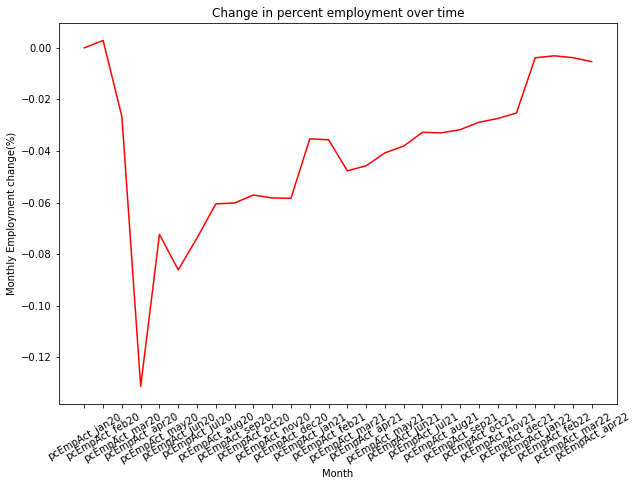

In [67]:
# Plotting sample industry data
df_percentemp_maricopa_industry=df_county_by_industry_maricopa[df_county_by_industry_maricopa.columns[32:60]]
fig = plt.figure(figsize =(10, 7))

plt.title('Change in percent employment over time')
plt.xlabel('Month')
plt.ylabel('Monthly Employment change(%)')
plt.xticks(rotation=30)
plt.plot(df_percentemp_maricopa.columns,df_percentemp_maricopa.iloc[0].values, 'r', label='Percent_employment_change')

In [68]:
clf_cases_df.head()

,year_x,month_x,number_of_cases,delta,date,DATE,Civilian_Labor_Force_Population,year_y,month_y
0,2020,1,6,0.0,2020/1,2020-01-01,2272861,2020,1
1,2020,2,29,23.0,2020/2,2020-02-01,2281937,2020,2
2,2020,3,4010,3981.0,2020/3,2020-03-01,2269254,2020,3
3,2020,4,68745,64735.0,2020/4,2020-04-01,2195961,2020,4
4,2020,5,214115,145370.0,2020/5,2020-05-01,2212060,2020,5


In [69]:
df_county_by_industry_maricopa.iloc[1].values

array([4013, 'Arizona', 'Maricopa County', 22,
       'Utilities                                                                                           ',
       4.84715423743332, 4.90984207995907, 4.84715423743332,
       4.85055603857377, 4.75535256286608, 4.89229270580657,
       5.07612851445742, 4.83433126866419, 4.84960295041778,
       4.8762337138678, 4.86211449715544, 4.83411146442699,
       4.81317685393562, 4.80718406029548, 4.90767684592084,
       4.88272903663735, 4.80611154520075, 4.81396748816706,
       4.81694060910732, 4.80369776972206, 4.80821570768879,
       4.77377020000443, 4.76403298825222, 4.74996779833902,
       4.72866352176527, 4.71366220409522, 4.80495983652888,
       4.78551903992532, 4.7659505431295, 0, 0.000182770723834658, 0.0,
       -0.00731261425959784, -0.00840946176588209, -0.0138939224605804,
       -0.0133454987074383, -0.0100548446069469, -0.00676419050645571,
       -0.00932353854833179, -0.00950642085380482, -0.0106032683600891,
       

In [70]:
filtered_df=df_county_by_industry_maricopa[df_county_by_industry_maricopa.columns[34:60]]

values_dict={}
for j in range(len(filtered_df)):
    xcov_monthly = [crosscorr(pd.Series(clf_cases_df.iloc[0:28]['delta']), pd.Series(filtered_df.iloc[j].values), lag=i) for i in range(20)]
    max_value = max(xcov_monthly)
    max_index = xcov_monthly.index(max_value)
    values_dict[7200+j+1]=(max_index, max_value)

In [71]:
min_values_dict={}
for j in range(len(filtered_df)):
    xcov_monthly = [crosscorr(pd.Series(clf_cases_df.iloc[0:28]['delta']), pd.Series(filtered_df.iloc[j].values), lag=i) for i in range(20)]
    max_value = min(xcov_monthly)
    max_index = xcov_monthly.index(max_value)
    min_values_dict[7200+j+1]=(max_index, max_value)

In [72]:
final_dict={}
for i in values_dict.keys():
    if values_dict[i][1]>abs(min_values_dict[i][1]):
        if values_dict[i][1]>0.7:
            #final_dict[i]=values_dict[i]
            continue
    else:
        if min_values_dict[i][1]<-0.7:
            final_dict[i]=min_values_dict[i]

In [73]:
final_dict

{7201: (18, -0.7620846308776791),
 7202: (18, -0.7132145659484582),
 7206: (17, -0.7271901496246335),
 7244: (15, -0.7973103729829343),
 7252: (17, -0.7583358976455519),
 7257: (14, -0.7003278642996527),
 7260: (15, -0.760855182812672),
 7274: (16, -0.7841826245310932)}

In [74]:
for i in final_dict:
    print (df_county_by_industry.loc[i]['naics_label'], final_dict[i])

Agriculture, Forestry, Fishing and Hunting (18, -0.7620846308776791)
Utilities                                                                                            (18, -0.7132145659484582)
Oil and gas extraction                                                                               (17, -0.7271901496246335)
Pipeline transportation                                                                              (15, -0.7973103729829343)
Telecommunications (17, -0.7583358976455519)
Insurance carriers and related activities                                                            (14, -0.7003278642996527)
Lessors of nonfinancial intangible assets (15, -0.760855182812672)
Computer and peripheral equipment                                                                    (16, -0.7841826245310932)


We see that these sectors had a direct negative correlation with COVID-19 cases. the increasein COVID-19 cases led to decrease in employment in them

In [75]:
final_dict={}
for i in values_dict.keys():
    if values_dict[i][1]>abs(min_values_dict[i][1]):
        if values_dict[i][1]>0.7:
            final_dict[i]=values_dict[i]
            
    else:
        if min_values_dict[i][1]<-0.7:
            continue
            #final_dict[i]=min_values_dict[i]

In [76]:
for i in final_dict:
    print (df_county_by_industry.loc[i]['naics_label'], final_dict[i])

Chemicals                                                                                            (12, 0.7692522237753042)
Building material and garden supply stores                                                           (17, 0.7584997497226029)
Food and beverage stores                                                                             (19, 0.8407630580906483)
Couriers and messengers                                                                              (15, 0.7443109220734725)
Warehousing and storage                                                                              (16, 0.7194752579992492)
Data processing, hosting and related services                                                        (13, 0.7647288250481603)
Monetary authorities - central bank (16, 0.7276187293089655)
Credit intermediation and related activities (14, 0.7122687894941596)
Computer systems design and related services                                                         (12, 0.71242

These were the top industries with high positive correlation with COVID-19 cases. The result shows Industry name, Lag month followed by correlation

## Question 4: What are the other factors that help measure the overall community risk for similar epidemics/pandemics in the future?

To answer this question we will be developing a linear regression model for determining the overall community risk index.

### 4.1 Data Reading

In [77]:
df_indexes=pd.read_csv('./Indexes.csv')

In [78]:
df_indexes.columns

Index(['state', 'st_abbr', 'county', 'fips', 'location',
       'Overall Community Risk Index',
       'Overall Community Risk Rating, National',
       'Overall Community Risk Rating, State', 'CDC Socio-economic Index',
       'CDC Socio-economic Rating, National',
       'CDC Socio-economic Rating, State', 'CDC Household Composition Index',
       'CDC Household Composition Rating, National',
       'CDC Household Composition Rating, State',
       'CDC Minority Status/Language Index',
       'CDC Minority Status/Language Rating, National',
       'CDC Minority Status/Language Rating, State', 'County Economic Index',
       'County Economic Rating, National', 'County Economic Rating, State',
       'Housing Stability Index', 'Housing Stability Rating, National',
       'Housing Stability Rating, State',
       'Local Government Revenue Vulnerability Index',
       'Local Government Revenue Vulnerability Rating, National',
       'Local Government Revenue Vulnerability Rating, State',

### 4.1.2 Data Cleaning

In [79]:
df_indexes.fillna(0, inplace=True)

## 4.2 Filtering the data for specific columns

In [80]:
train_test_df=df_indexes[['Overall Community Risk Index',
'CDC Socio-economic Index',
'CDC Minority Status/Language Index',
'County Economic Index',
'Housing Stability Index']]

### 4.3 Splitting the data for linear regression model

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_test_df.drop(columns=['Overall Community Risk Index']),
                                                                       train_test_df['Overall Community Risk Index'],
                                                    test_size=0.25)

## 4.4 Training the linear regression model

In [82]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, y_train)  # perform linear regression
Y_pred = linear_regressor.predict(X_test)

In [83]:
from sklearn.metrics import mean_absolute_percentage_error
import math
mean_absolute_percentage_error(Y_pred, y_test)

0.06439324203332265

## 4.5 Presenting the results

In [84]:
results_df=pd.DataFrame(zip (train_test_df.columns[1:], linear_regressor.coef_))

In [85]:
results_df.columns=['Index', 'LR Coefficient']

In [86]:
results_df

,Index,LR Coefficient
0,CDC Socio-economic Index,0.440483
1,CDC Minority Status/Language Index,0.305672
2,County Economic Index,0.401604
3,Housing Stability Index,0.287949


We see that each of the indexes contribute in the calculating the overall community risk index. To explain, a unit change in CDC Socio-economic index leads to 0.44 change in overall community risk index keeping all other variables constant